In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [2]:
df = pd.read_csv("../data/adult.csv")
df_cleaned = df.replace("?", np.nan).dropna()
incorrect_data = df_cleaned[
    ((df_cleaned["salary"] == "<=50K") & (df_cleaned["salary K$"] > 50)) |
    ((df_cleaned["salary"] == ">50K") & (df_cleaned["salary K$"] <= 50))
]
df_cleaned = df_cleaned.drop(incorrect_data.index)

# Task 1
Print the count of men and women in the dataset.

In [3]:
sex = df_cleaned["sex"].value_counts()
print(sex)

Male      20380
Female     9782
Name: sex, dtype: int64


# Task 2
Find the average age of men in dataset

In [4]:
men = df_cleaned[df_cleaned["sex"] == "Male"]
avg_men_age = men["age"].mean()
print(round(avg_men_age))

39


# Task 3
Get the percentage of people from Poland (native-country)

In [5]:
ppl_from_poland = df_cleaned[df_cleaned["native-country"] == "Poland"]
percentage_of_poland_ppl = (len(ppl_from_poland) / len(df_cleaned)) * 100
print(round(percentage_of_poland_ppl, 2))

0.19


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [7]:
goodfellas_mean = df_cleaned[df_cleaned["salary"] == ">50K"]["age"].mean()
goodfellas_std = df_cleaned[df_cleaned["salary"] == ">50K"]["age"].std()

unluckies_mean = df_cleaned[df_cleaned["salary"] == "<=50K"]["age"].mean()
unluckies_std = df_cleaned[df_cleaned["salary"] == "<=50K"]["age"].std()
print(goodfellas_mean, goodfellas_std, unluckies_mean, unluckies_std)

43.95911028236548 10.269632835673852 36.60806038668668 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [9]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
golden_boys = df_cleaned[(df_cleaned["education"].isin(higher_education) == False) & (df_cleaned["salary"] == ">50K")]
print(higher_education, golden_boys)


['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']        Unnamed: 0  age         workclass     education      marital-status  \
7               7   52  Self-emp-not-inc       HS-grad  Married-civ-spouse   
10             10   37           Private  Some-college  Married-civ-spouse   
55             55   43           Private  Some-college  Married-civ-spouse   
67             67   53           Private       HS-grad  Married-civ-spouse   
68             68   49      Self-emp-inc  Some-college  Married-civ-spouse   
...           ...  ...               ...           ...                 ...   
32462       32462   48      Self-emp-inc       HS-grad  Married-civ-spouse   
32518       32518   57         Local-gov       HS-grad  Married-civ-spouse   
32519       32519   46           Private  Some-college  Married-civ-spouse   
32557       32557   40           Private       HS-grad  Married-civ-spouse   
32560       32560   52      Self-emp-inc       HS-grad  Marrie

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [10]:
age_stats = df_cleaned.groupby("education")["age"].describe()
print(age_stats)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [12]:
married_men = men[(men["marital-status"].str.startswith("Married"))]
happy_men = men[(~men["marital-status"].str.startswith("Married"))]
rich_married_men = married_men[married_men["salary"] == ">50K"]
rich_happy_men = happy_men[happy_men["salary"] == ">50K"]

poor_married_men = married_men[married_men["salary"] == "<=50K"]
poor_happy_men = happy_men[happy_men["salary"] == "<=50K"]
print(len(rich_married_men), len(rich_happy_men))
print(len(poor_married_men), len(poor_happy_men))

5723 673
7052 6932


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [13]:
max_hours = df_cleaned["hours-per-week"].max()
ppl_works_max_hours = len(df_cleaned[df_cleaned["hours-per-week"] == max_hours])
print(ppl_works_max_hours)

78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Correlation between salary K$ and higher education:
                  salary K$  higher_education
salary K$          1.000000          0.254759
higher_education   0.254759          1.000000


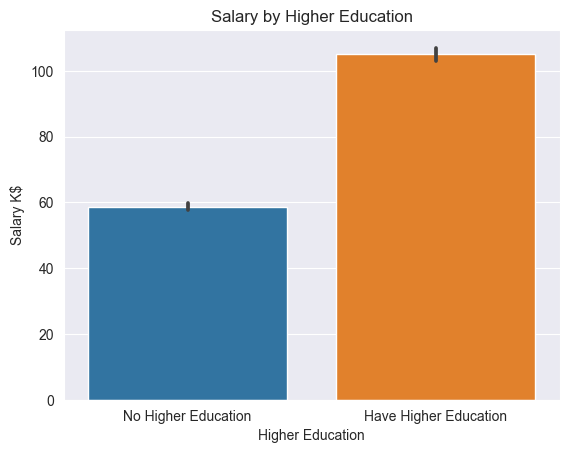

Correlation between age and salary:
0.20820286434202667
Correlation between hours per week and salary:
0.1963783004672401
Correlation between is male and salary:
0.18264209616246793


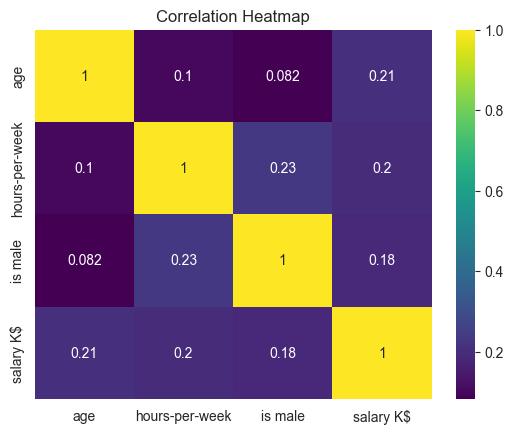

In [14]:
df_cleaned["is male"] = df_cleaned["sex"].apply(lambda x: x == "Male")
df_cleaned["higher_education"] = df_cleaned["education"].apply(lambda x: x in higher_education)
df_cleaned["is male"] = df_cleaned["sex"].apply(lambda x: x == "Male")
correlations = df_cleaned[["age", "hours-per-week", "is male", "salary K$"]].corr()
corr_high_edu_and_salary = df_cleaned[["salary K$", "higher_education"]]

print("Correlation between salary K$ and higher education:")
print(corr_high_edu_and_salary.corr())

sns.barplot(x="higher_education", y="salary K$", data=df_cleaned).set_xticklabels(["No Higher Education", "Have Higher Education"])
plt.title("Salary by Higher Education")
plt.xlabel("Higher Education")
plt.ylabel("Salary K$")
plt.show()
print("Correlation between age and salary:")
print(correlations.loc["age", "salary K$"])


print("Correlation between hours per week and salary:")
print(correlations.loc["hours-per-week", "salary K$"])

print("Correlation between is male and salary:")
print(correlations.loc["is male", "salary K$"])

sns.heatmap(correlations, annot=True, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()
